## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [221]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [222]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col = "Timestamp",
    infer_datetime_format = True,
    parse_dates = True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [223]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()
#bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [224]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col = "Timestamp",
    infer_datetime_format = True,
    parse_dates = True
)

In [225]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()
#coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [226]:
# For the Bitstamp dataFrame, replace or drop all NaNs or missing values in the DataFrame

print(bitstamp.isna().sum()) # Getting the statistics on the number of NaN values for Bitstamp dataframe

bitstamp.dropna(inplace=True) # Dropping all NaN values with inplace parameter set to True

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [227]:
# Checking there are no NaN values in Bistamp dataframe
print(bitstamp.isna().sum())

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64


In [228]:
print(bitstamp.dtypes) # Looking at columns where $ signs can potentially occur

# Using str.find('$') fuction along with the sum() function for Close column we can identify the total number of values with $ sign. 
# str.find('substr') returns the position of the substring in the given string
bitstamp["Close"].str.find("$").value_counts()

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object


0    129067
Name: Close, dtype: int64

> Statistics above shows that all Close values have dollar sign in the beginning (0 position was returned by str.find() function). The code below replaces $ sign in each value of the Close column

In [229]:
# Use the str.replace function to remove the dollar sign, $#
bitstamp["Close"] = bitstamp["Close"].str.replace('$', '')
bitstamp["Close"].str.find("$").value_counts() # Checking that there are no $ signs anymore

C:\Users\KIRILL~1.PAN\AppData\Local\Temp/ipykernel_40880/2954310378.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp["Close"] = bitstamp["Close"].str.replace('$', '')


-1    129067
Name: Close, dtype: int64

### Step 3: Convert the data type of the Close column to a `float`.


In [230]:
# Using astype function to convert the data type for Close column from Object to float
bitstamp["Close"] = bitstamp["Close"].astype(float)
bitstamp["Close"]

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: float64

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [231]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [232]:
# For the Coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame

print(coinbase.isna().sum()) # Getting the statistics on the number of NaN values for Coinbase dataframe
coinbase.dropna(inplace=True)

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64


In [233]:
# Checking there are no NaN values in Coinbase dataframe
print(coinbase.isna().sum())

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64


In [234]:
print(coinbase.dtypes) # Looking at columns where $ signs can potentially occur

# Using str.find('$') fuction along with the sum() function for Close column we can identify the total number of values with $ sign. 
# str.find('substr') returns the position of the substring in the given string
coinbase["Close"].str.find("$").value_counts()

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object


0    129322
Name: Close, dtype: int64

> Statistics above shows that all Close values have dollar sign in the beginning (0 position was returned by str.find() function). The code below replaces $ sign in each value of the Close column

In [235]:
# Use the str.replace function to remove the dollar sign, $#
coinbase["Close"] = coinbase["Close"].str.replace('$', '')
coinbase["Close"].str.find("$").value_counts() # Checking that there are no $ signs anymore

C:\Users\KIRILL~1.PAN\AppData\Local\Temp/ipykernel_40880/1910645700.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase["Close"] = coinbase["Close"].str.replace('$', '')


-1    129322
Name: Close, dtype: int64

In [236]:
# Using astype function to convert the data type for Close column from Object to float
coinbase["Close"] = coinbase["Close"].astype(float)
coinbase["Close"]

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00     6930.00
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00     6934.00
Name: Close, Length: 129322, dtype: float64

In [237]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [238]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.iloc[0:5]

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [239]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.iloc[0:5]

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [240]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [241]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Close Prices'}, xlabel='Timestamp'>

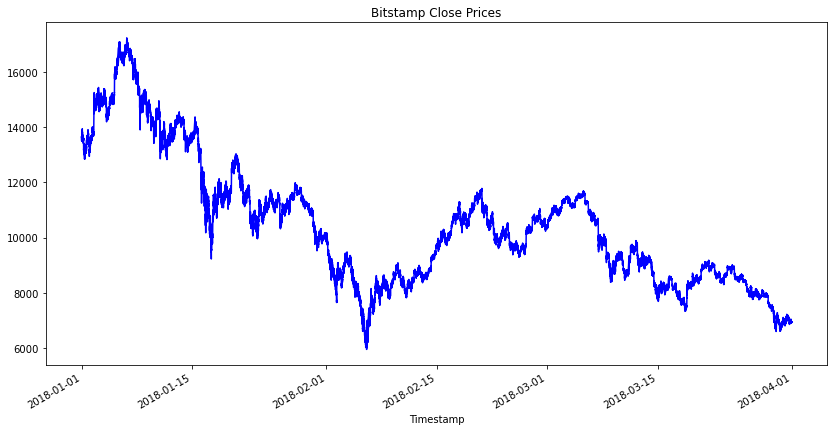

In [242]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(14,7), title="Bitstamp Close Prices", color = "blue")

<AxesSubplot:title={'center':'Coinbase Close Prices'}, xlabel='Timestamp'>

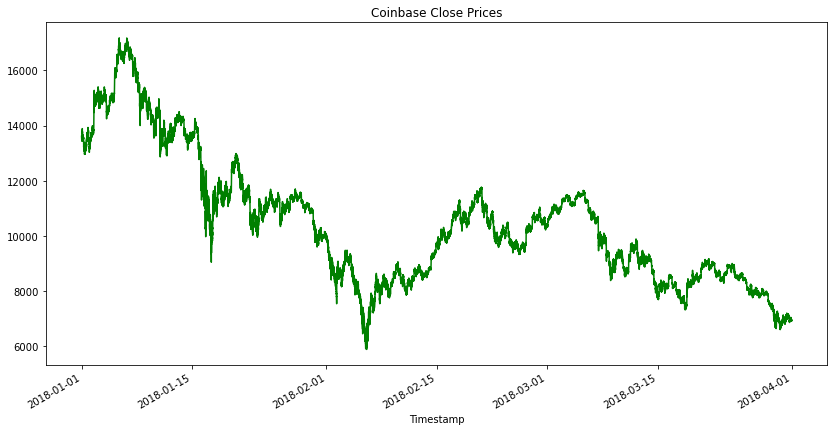

In [243]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(14,7), title = "Coinbase Close Prices", color = "green")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Close Prices'}, xlabel='Timestamp'>

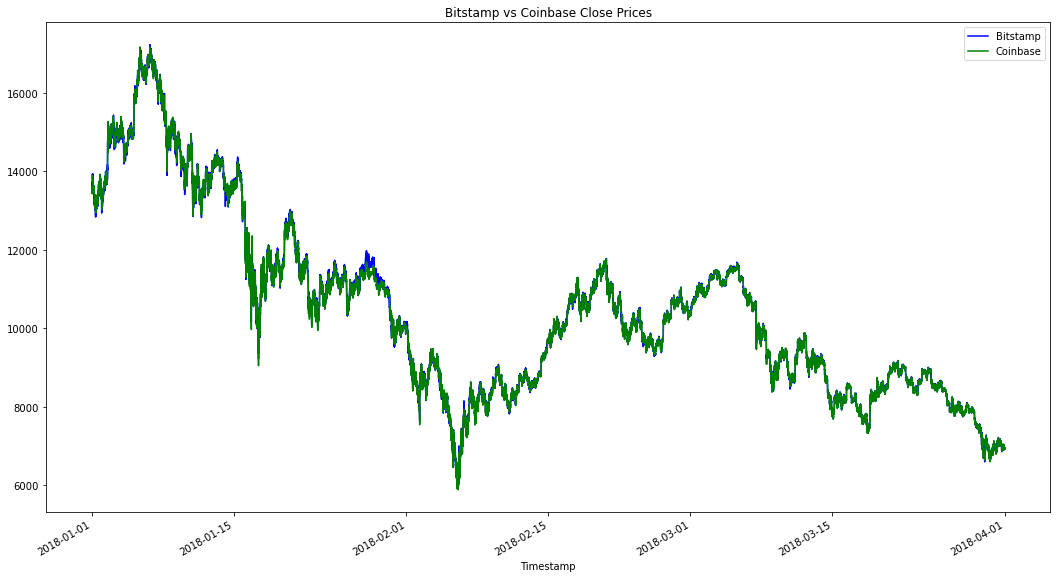

In [244]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(figsize=(18,10), title="Bitstamp vs Coinbase Close Prices", color = "blue", label = "Bitstamp", legend = True)
coinbase_sliced.plot(figsize=(18,10), color = "green", label = "Coinbase", legend = True)

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Close Prices. January 2018'}, xlabel='Timestamp'>

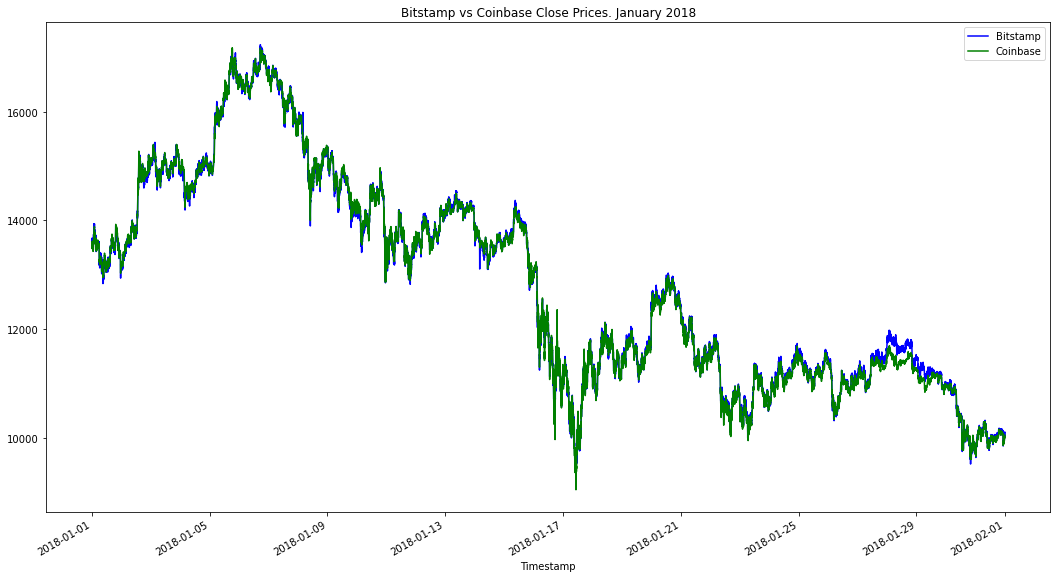

In [245]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc["2018-01-01":"2018-01-31"].plot(figsize=(18,10), title="Bitstamp vs Coinbase Close Prices. January 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase_sliced.loc["2018-01-01":"2018-01-31"].plot(figsize=(18,10), color = "green", label = "Coinbase", legend = True)

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Close Prices. February 2018'}, xlabel='Timestamp'>

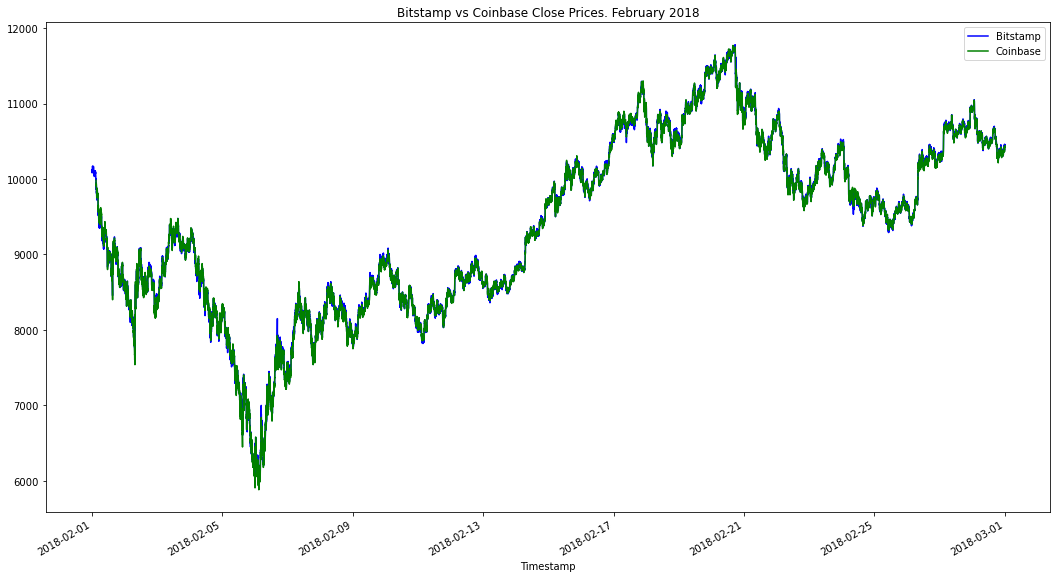

In [246]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc["2018-02-01":"2018-02-28"].plot(figsize=(18,10), title="Bitstamp vs Coinbase Close Prices. February 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase_sliced.loc["2018-02-01":"2018-02-28"].plot(figsize=(18,10), color = "green", label = "Coinbase", legend = True)

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Close Prices. March 2018'}, xlabel='Timestamp'>

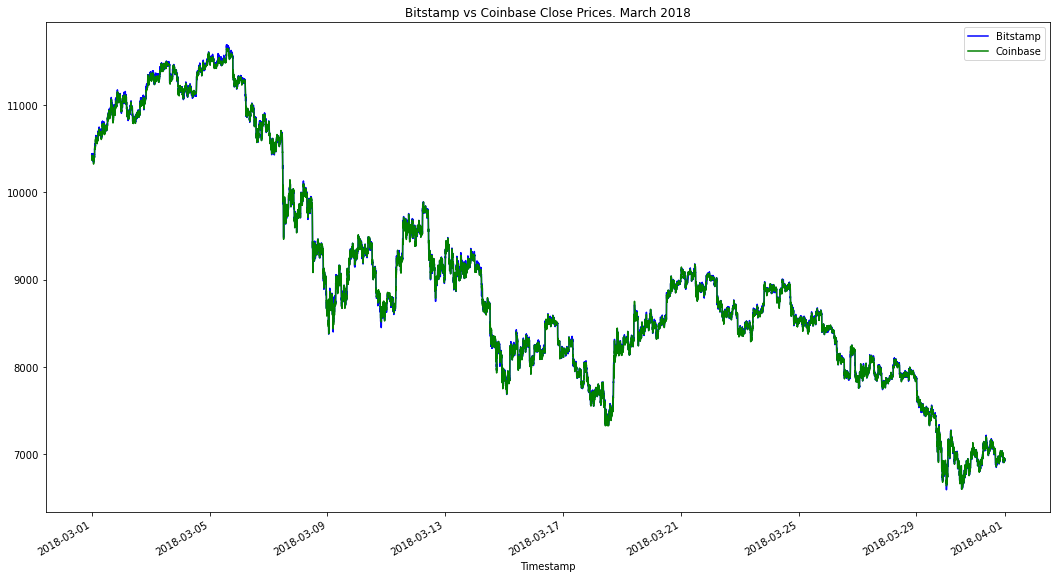

In [247]:
bitstamp_sliced.loc["2018-03-01":"2018-03-31"].plot(figsize=(18,10), title="Bitstamp vs Coinbase Close Prices. March 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase_sliced.loc["2018-03-01":"2018-03-31"].plot(figsize=(18,10), color = "green", label = "Coinbase", legend = True)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer:** Based on the visualizations built, the degree of spread has significantly decreased in February and March 2018 compared with January 2018, especially after the spike around January 28th 2018 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Close Prices. January 28 2018'}, xlabel='Timestamp'>

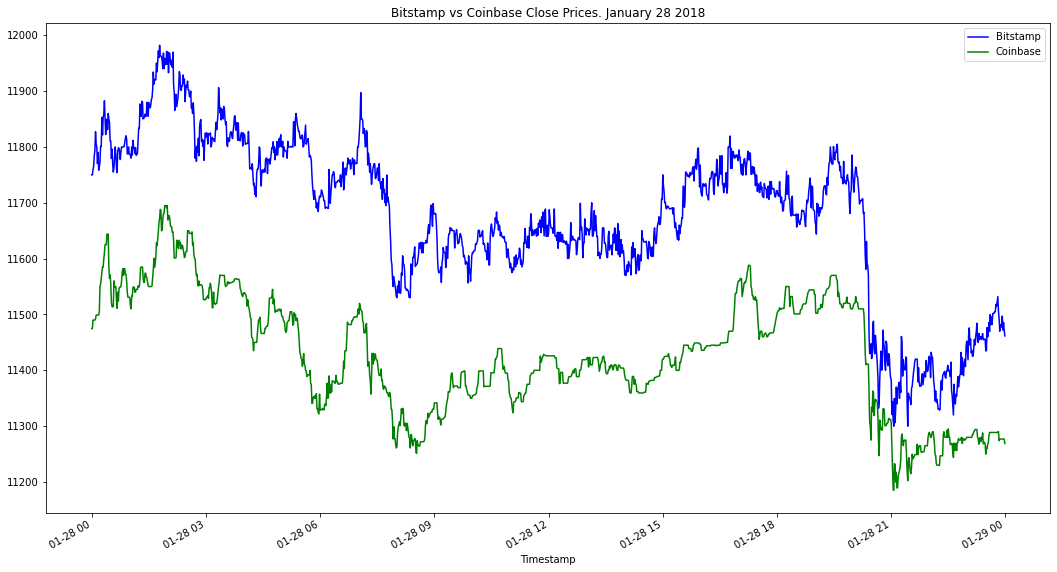

In [248]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-01-28"].plot(figsize=(18,10), title="Bitstamp vs Coinbase Close Prices. January 28 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase_sliced.loc["2018-01-28"].plot(figsize=(18,10), color = "green", label = "Coinbase", legend = True)

In [249]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc["2018-01-28"] - coinbase_sliced.loc["2018-01-28"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

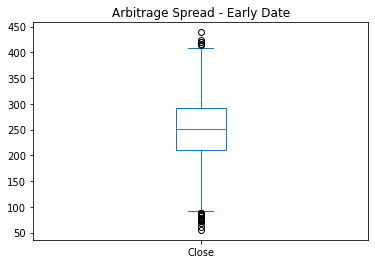

In [250]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = "box", title = "Arbitrage Spread - Early Date")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Close Prices. February 23 2018'}, xlabel='Timestamp'>

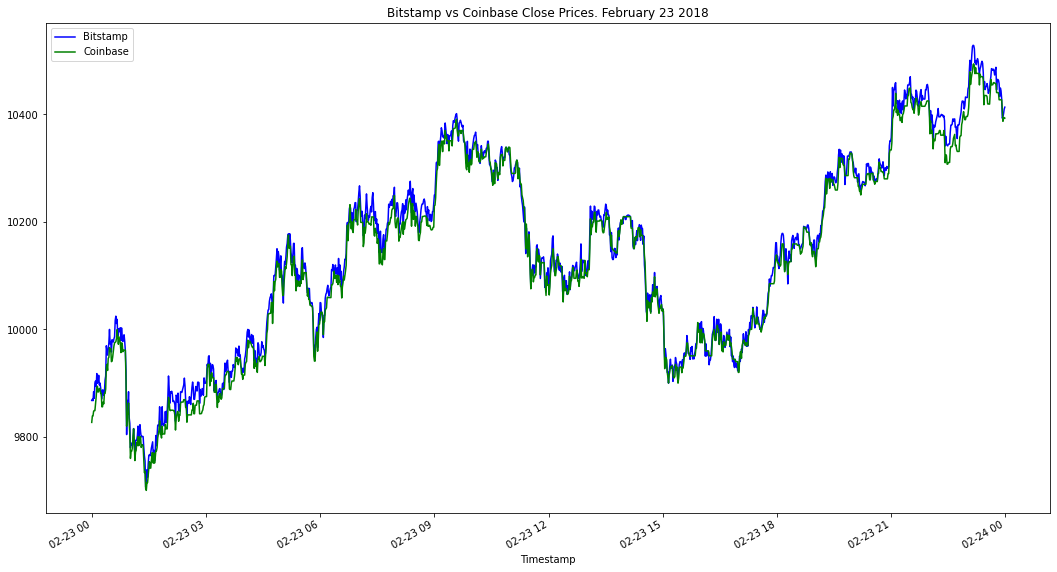

In [251]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-02-23"].plot(figsize=(18,10), title = "Bitstamp vs Coinbase Close Prices. February 23 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase_sliced.loc["2018-02-23"].plot(figsize=(18,10), color = "green", label = "Coinbase", legend = True)

In [252]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc["2018-02-23"] - coinbase_sliced.loc["2018-02-23"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean       13.835741
std        12.897678
min       -25.000000
25%         5.020000
50%        13.740000
75%        22.650000
max        59.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

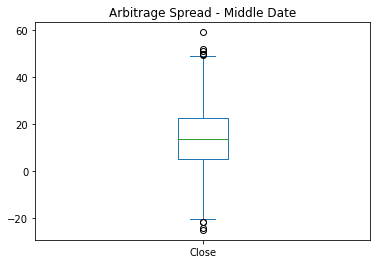

In [253]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = "box", title = "Arbitrage Spread - Middle Date")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Close Prices. March 05 2018'}, xlabel='Timestamp'>

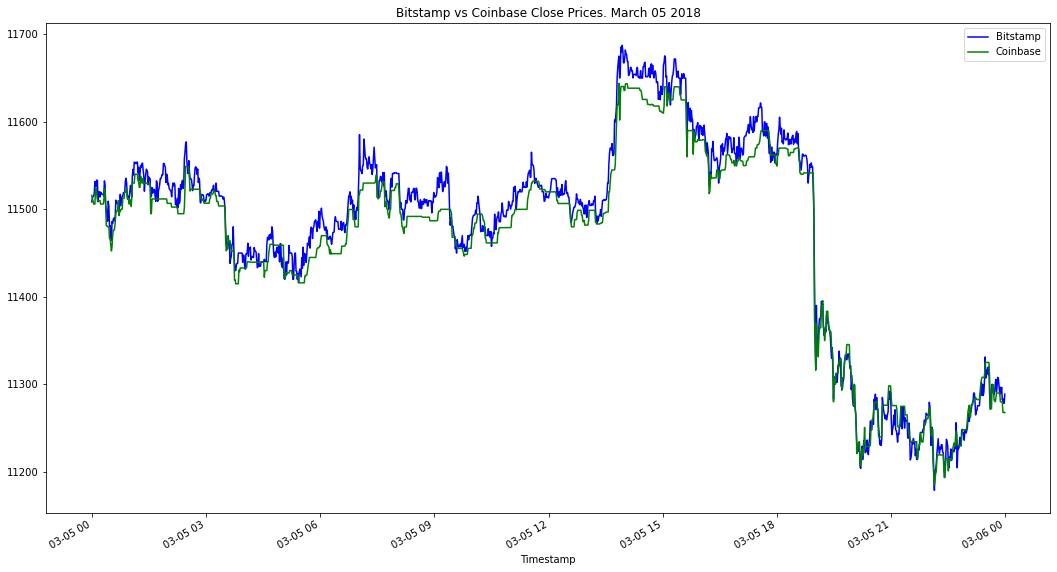

In [254]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-03-05"].plot(figsize=(18,10), title="Bitstamp vs Coinbase Close Prices. March 05 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase_sliced.loc["2018-03-05"].plot(figsize=(18,10), color = "green", label = "Coinbase", legend = True)

In [255]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc["2018-03-05"] - coinbase_sliced.loc["2018-03-05"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1437.000000
mean       11.817683
std        14.276780
min       -33.180000
25%         2.940000
50%        11.500000
75%        20.470000
max        68.280000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

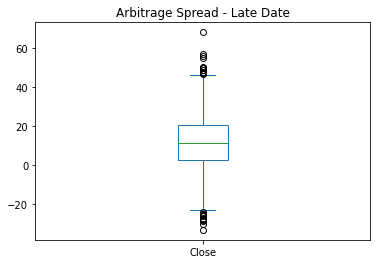

In [256]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind = "box", title = "Arbitrage Spread - Late Date")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [257]:
# Generating the summary statistics for Early date DataFrame where spread is greater than 0
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]

arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [258]:
# Generating the summary statistics for Middle date DataFrame where spread is greater than 0
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]

arbitrage_spread_middle.describe()

count    1247.000000
mean       16.993601
std        10.536648
min         0.040000
25%         8.660000
50%        15.920000
75%        24.010000
max        59.010000
Name: Close, dtype: float64

In [259]:
# Generating the summary statistics for Middle date DataFrame where spread is greater than 0
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]

arbitrage_spread_late.describe()

count    1155.000000
mean       16.740208
std        10.860019
min         0.020000
25%         8.880000
50%        14.790000
75%        23.195000
max        68.280000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [260]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early / coinbase_sliced.loc["2018-01-28"]

# Review the spread return DataFrame
spread_return_early.describe()

count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64

In [261]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle / coinbase_sliced.loc["2018-02-23"]

# Review the spread return DataFrame
spread_return_middle.describe()

count    1247.000000
mean        0.001677
std         0.001039
min         0.000004
25%         0.000854
50%         0.001570
75%         0.002366
max         0.005679
Name: Close, dtype: float64

In [262]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late / coinbase_sliced.loc["2018-03-05"]

# Review the spread return DataFrame
spread_return_late.describe()

count    1155.000000
mean        0.001455
std         0.000940
min         0.000002
25%         0.000772
50%         0.001288
75%         0.002023
max         0.005929
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [263]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [264]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

> The output above for the middle date is empty that means there weren't any profitable trades during this day of February 23 2018. Further analysis of this date doesn't make sense. 

In [265]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

> The output above for the late date is empty that means there weren't any profitable trades during this day of March 5 2018. Further analysis of this date doesn't make sense

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [266]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [267]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc["2018-01-28"]

# Looking for mising values
print(profit_early.isna().sum())

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

62


Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [268]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

# Show the trade with the maximum profit
#print(profit_per_trade_early[profit_per_trade_early == profit_per_trade_early.max()])

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade. January 28 2018'}, xlabel='Timestamp'>

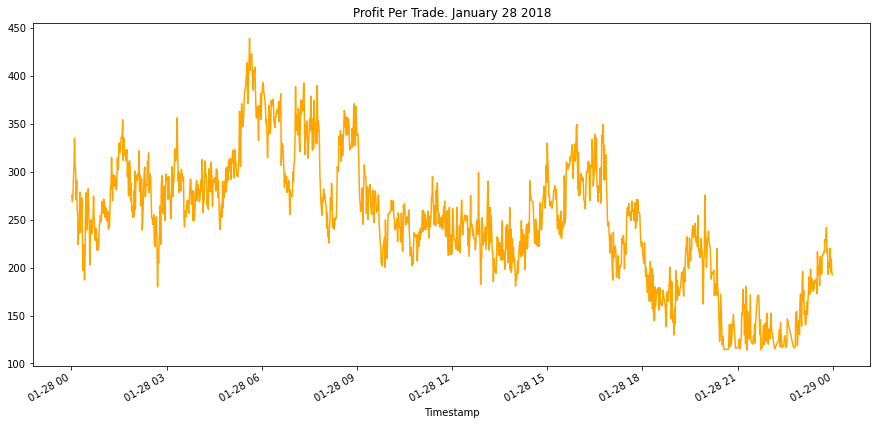

In [269]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize = (15,7), color = "orange", title = "Profit Per Trade. January 28 2018")


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [270]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

349918.2900000001

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [271]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum. January 28 2018'}, xlabel='Timestamp'>

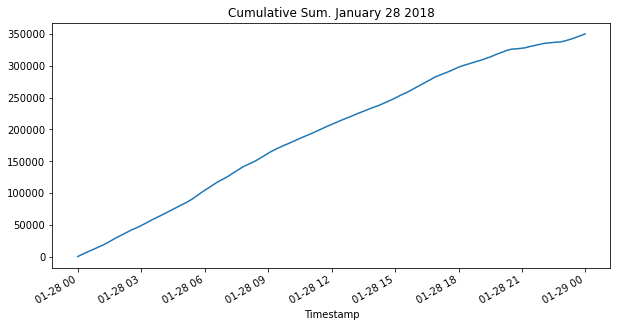

In [272]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize = (10,5), title = "Cumulative Sum. January 28 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** After the spread spike between the Coinbase and Bitstamp prices for Bitcoin in January 2018 arbitrage spread significantly decreased that in turn reduced the posible profit to 0  